# Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df1['team1'] = df1['team1'].replace("Delhi Daredevils" , "Delhi Capitals")
df1['team2'] = df1['team2'].replace("Delhi Daredevils" , "Delhi Capitals")
df1['winner'] = df1['winner'].replace("Delhi Daredevils" , "Delhi Capitals")



# Ques 1 - win ?

In [8]:
main_df = df1[((df1['team1'] == 'Delhi Capitals') & (df1['team2'] == 'Kings XI Punjab')) | ((df1['team1'] == 'Kings XI Punjab') & (df1['team2'] == 'Delhi Capitals'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
160,161,2009,Bloemfontein,2009-05-15,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,B Lee,OUTsurance Oval,HDPK Dharmasena,IL Howell,NaN
176,177,2010,Chandigarh,2010-03-13,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,0,Delhi Capitals,0,5,G Gambhir,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
217,218,2010,Delhi,2010-04-11,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Kings XI Punjab,0,7,PP Chawla,Feroz Shah Kotla,BF Bowden,AM Saheba,NaN
258,259,2011,Delhi,2011-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Capitals,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN
292,293,2011,Dharamsala,2011-05-15,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,0,Kings XI Punjab,29,0,PP Chawla,Himachal Pradesh Cricket Association Stadium,Asad Rauf,SL Shastri,NaN


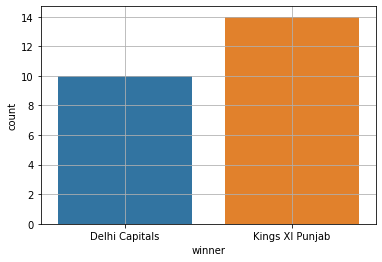

In [9]:
# Check winner
sb.countplot(main_df['winner'])
plt.grid()
plt.show()

In [ ]:
'''
Looking at the stats from this dataset
KXP has won - 14 match
DC - 10 match
But since , the datasets are from the INDIAN staidum , we have to look at the recent performance of the team to decide

'''

In [ ]:
'''
From this year IPL stats , DC has won 7 matches and KXP has won 3 match 
In the last face-off DC won by superover
'''

In [ ]:
'''
Yet , the kxp is playing very strong from the last 4 matches ,and the entry of gayle has made it more strong with the bowling department aalso performing best
also , the match is being played in Dubai International Stadium , the bowling will also play a major role in this .

'''

In [11]:
# Hence, I guess, this time KXP will win 

# Ques 1 ans - KXIP

In [12]:
#############################################################################################################################3

# Ques 2 - KL rahul strike rate in first 6 over ?

In [14]:
main_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN


In [15]:
main_df_team = df[(((df['batting_team'] == 'Kings XI Punjab')  & ((df['bowling_team'] == 'Delhi Capitals'))))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167689,11149,1,Kings XI Punjab,Delhi Capitals,1,1,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167690,11149,1,Kings XI Punjab,Delhi Capitals,1,2,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167691,11149,1,Kings XI Punjab,Delhi Capitals,1,3,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167692,11149,1,Kings XI Punjab,Delhi Capitals,1,4,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167693,11149,1,Kings XI Punjab,Delhi Capitals,1,5,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173615,11328,1,Kings XI Punjab,Delhi Capitals,20,2,H Brar,H Viljoen,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173616,11328,1,Kings XI Punjab,Delhi Capitals,20,3,H Viljoen,H Brar,K Rabada,0,...,2,0,0,0,2,2,4,NaN,NaN,NaN
173617,11328,1,Kings XI Punjab,Delhi Capitals,20,4,H Viljoen,H Brar,K Rabada,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
173618,11328,1,Kings XI Punjab,Delhi Capitals,20,5,H Viljoen,H Brar,K Rabada,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN


In [20]:
# Lets first take th starting 6 over
powerplay = main_df_team[main_df_team['over'] <=6]

In [21]:
powerplay.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167689,11149,1,Kings XI Punjab,Delhi Capitals,1,1,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167690,11149,1,Kings XI Punjab,Delhi Capitals,1,2,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167691,11149,1,Kings XI Punjab,Delhi Capitals,1,3,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167692,11149,1,Kings XI Punjab,Delhi Capitals,1,4,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167693,11149,1,Kings XI Punjab,Delhi Capitals,1,5,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [22]:
# and now lets consider batsman = rahul
rahul = powerplay[powerplay['batsman'] == 'KL Rahul']
rahul

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167689,11149,1,Kings XI Punjab,Delhi Capitals,1,1,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167690,11149,1,Kings XI Punjab,Delhi Capitals,1,2,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167691,11149,1,Kings XI Punjab,Delhi Capitals,1,3,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167692,11149,1,Kings XI Punjab,Delhi Capitals,1,4,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167693,11149,1,Kings XI Punjab,Delhi Capitals,1,5,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167694,11149,1,Kings XI Punjab,Delhi Capitals,1,6,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167695,11149,1,Kings XI Punjab,Delhi Capitals,2,1,KL Rahul,S Curran,CH Morris,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167696,11149,1,Kings XI Punjab,Delhi Capitals,2,2,KL Rahul,S Curran,CH Morris,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167697,11149,1,Kings XI Punjab,Delhi Capitals,2,3,KL Rahul,S Curran,CH Morris,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167698,11149,1,Kings XI Punjab,Delhi Capitals,2,4,KL Rahul,S Curran,CH Morris,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [23]:
# To calculate strike rate
# Sr = (runs / total balls)*100

In [29]:
# lets find the avg sr 
match_1 = rahul[rahul['match_id'] == 11149]

In [32]:
runs = match_1['batsman_runs'].sum()
balls = len(match_1)

In [34]:
sr1 = (runs / balls)*100
sr1

136.36363636363635

In [35]:
match_2 = rahul[rahul['match_id'] == 11328]
runs = match_2['batsman_runs'].sum()
balls = len(match_2)
sr2 = (runs / balls)*100
sr2

133.33333333333331

In [36]:
# avg sr
(136.36+133.33)/2

134.84500000000003

In [37]:
## Therefore avg sr of kl rahul against Dc is 134.84

In [38]:
## lets check wrt all team now.

In [39]:
main_df_team_all = df[(((df['batting_team'] == 'Kings XI Punjab')))]
powerplay = main_df_team_all[main_df_team_all['over'] <=6]
rahul = powerplay[powerplay['batsman'] == 'KL Rahul']
rahul

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150830,7895,2,Kings XI Punjab,Delhi Daredevils,1,1,KL Rahul,MA Agarwal,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150831,7895,2,Kings XI Punjab,Delhi Daredevils,1,2,KL Rahul,MA Agarwal,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150832,7895,2,Kings XI Punjab,Delhi Daredevils,1,3,KL Rahul,MA Agarwal,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150833,7895,2,Kings XI Punjab,Delhi Daredevils,1,4,KL Rahul,MA Agarwal,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150834,7895,2,Kings XI Punjab,Delhi Daredevils,1,5,KL Rahul,MA Agarwal,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177783,11346,2,Kings XI Punjab,Chennai Super Kings,4,6,KL Rahul,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177788,11346,2,Kings XI Punjab,Chennai Super Kings,5,5,KL Rahul,CH Gayle,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177789,11346,2,Kings XI Punjab,Chennai Super Kings,5,6,KL Rahul,CH Gayle,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177793,11346,2,Kings XI Punjab,Chennai Super Kings,6,4,KL Rahul,CH Gayle,DJ Bravo,0,...,0,4,0,0,4,4,8,NaN,NaN,NaN


In [40]:
rahul['match_id'].unique()

array([ 7895,  7901,  7905,  7909,  7911,  7915,  7918,  7927,  7931,
        7933,  7937,  7941,  7943,  7949, 11140, 11142, 11145, 11149,
       11309, 11313, 11315, 11319, 11323, 11328, 11333, 11339, 11343,
       11346], dtype=int64)

In [41]:
sr = []
matches = [ 7895,  7901,  7905,  7909,  7911,  7915,  7918,  7927,  7931,
        7933,  7937,  7941,  7943,  7949, 11140, 11142, 11145, 11149,
       11309, 11313, 11315, 11319, 11323, 11328, 11333, 11339, 11343,
       11346]
for i in matches:
    match = rahul[rahul['match_id'] == i]
    runs = match['batsman_runs'].sum()
    balls = len(match)
    sr.append((runs / balls)*100)
   
    

In [42]:
sr

[318.75,
 178.57142857142858,
 186.66666666666666,
 94.11764705882352,
 253.33333333333331,
 153.33333333333334,
 138.0952380952381,
 117.64705882352942,
 117.64705882352942,
 108.0,
 194.73684210526315,
 146.66666666666666,
 150.0,
 66.66666666666666,
 100.0,
 20.0,
 62.5,
 136.36363636363635,
 162.5,
 75.0,
 114.28571428571428,
 92.3076923076923,
 30.76923076923077,
 133.33333333333331,
 170.0,
 107.40740740740742,
 28.57142857142857,
 256.52173913043475]

In [44]:
sr_all = np.array(sr).mean()

In [45]:
sr_all

132.63543293976272

In [46]:
## KL has an avg sr of 132.63 against all team

In [47]:
## Hence , the ans is 122-137 

# Ques 2 ans  - 122-137

In [48]:
#########################################################################################################################

# Ques 3 - Shreyas Iyer contribution for DC total score

In [50]:
# formula =  ((shreyas score) / (total score)*)100

In [53]:
df['bowling_team'] = df['bowling_team'].replace('Delhi Daredevils' , 'Delhi Capitals')

In [54]:
main_df_team_1 = df[(((df['batting_team'] == 'Delhi Capitals')  & ((df['bowling_team'] == 'Kings XI Punjab'))))]
main_df_team_1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167813,11149,2,Delhi Capitals,Kings XI Punjab,1,1,P Shaw,S Dhawan,R Ashwin,0,...,0,0,0,0,0,0,0,P Shaw,caught,KL Rahul
167814,11149,2,Delhi Capitals,Kings XI Punjab,1,2,SS Iyer,S Dhawan,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167815,11149,2,Delhi Capitals,Kings XI Punjab,1,3,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167816,11149,2,Delhi Capitals,Kings XI Punjab,1,4,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
167817,11149,2,Delhi Capitals,Kings XI Punjab,1,5,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [55]:
total_score = main_df_team_1['total_runs'].sum()
match = main_df_team_1['match_id'].nunique()

In [57]:
total_score / match 

170.0

In [59]:
# avg os 170 runs per match

In [60]:
main_df_team_1['batsman'].unique()

array(['P Shaw', 'SS Iyer', 'S Dhawan', 'RR Pant', 'C Ingram',
       'CH Morris', 'H Vihari', 'HV Patel', 'Avesh Khan', 'K Rabada',
       'S Lamichhane', 'AR Patel', 'S Rutherford'], dtype=object)

In [61]:
shreyas = main_df_team_1[main_df_team_1['batsman'] == 'SS Iyer']

In [63]:
shreyas_score = shreyas['total_runs'].sum()
match = shreyas['match_id'].nunique()

In [64]:
shreyas_score / match

48.0

In [65]:
# avg of 48 runs per match

In [66]:
# contribution
(48 /170)*100

28.235294117647058

In [67]:
# Avg contribution of shreyas is 28.23 in the total runs for DC wrt KXIP

In [68]:
# now lets check for entire teams

In [69]:
main_df_team_2 = df[(((df['batting_team'] == 'Delhi Capitals')))]
total_score = main_df_team_2['total_runs'].sum()
match = main_df_team_2['match_id'].nunique()

total = total_score / match 
shreyas = main_df_team_2[main_df_team_2['batsman'] == 'SS Iyer']
shreyas_score = shreyas['total_runs'].sum()
match = shreyas['match_id'].nunique()
s_total = shreyas_score / match

print((s_total / total)*100)

19.04942965779468


In [70]:
# avg contribution is 19.04 in total runs of DC wrt to all team

In [72]:
# Hence ,ans is more than 18.1 %

# Ques 3 ans  - 18.1 %

In [75]:
###########################################################################################################################

# Ques 4 - Wickets taken by KXIP excluding shami from 31-120

In [79]:
main_df_team_1= df[(((df['batting_team'] == 'Delhi Capitals')  & ((df['bowling_team'] == 'Kings XI Punjab'))))]

main_df_team_1


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167813,11149,2,Delhi Capitals,Kings XI Punjab,1,1,P Shaw,S Dhawan,R Ashwin,0,...,0,0,0,0,0,0,0,P Shaw,caught,KL Rahul
167814,11149,2,Delhi Capitals,Kings XI Punjab,1,2,SS Iyer,S Dhawan,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167815,11149,2,Delhi Capitals,Kings XI Punjab,1,3,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167816,11149,2,Delhi Capitals,Kings XI Punjab,1,4,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
167817,11149,2,Delhi Capitals,Kings XI Punjab,1,5,S Dhawan,SS Iyer,R Ashwin,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [81]:
over = main_df_team_1[main_df_team_1['over']>=5]
over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167840,11149,2,Delhi Capitals,Kings XI Punjab,5,1,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167841,11149,2,Delhi Capitals,Kings XI Punjab,5,2,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167842,11149,2,Delhi Capitals,Kings XI Punjab,5,3,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167843,11149,2,Delhi Capitals,Kings XI Punjab,5,4,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167844,11149,2,Delhi Capitals,Kings XI Punjab,5,5,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [82]:
over['bowler'].unique()

array(['H Viljoen', 'Mohammed Shami', 'M Ur Rahman', 'R Ashwin',
       'M Ashwin', 'S Curran', 'H Brar'], dtype=object)

In [83]:
bowler = over[over['bowler'] != 'Mohammed Shami']
bowler

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167840,11149,2,Delhi Capitals,Kings XI Punjab,5,1,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167841,11149,2,Delhi Capitals,Kings XI Punjab,5,2,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167842,11149,2,Delhi Capitals,Kings XI Punjab,5,3,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167843,11149,2,Delhi Capitals,Kings XI Punjab,5,4,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167844,11149,2,Delhi Capitals,Kings XI Punjab,5,5,SS Iyer,S Dhawan,H Viljoen,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173735,11328,2,Delhi Capitals,Kings XI Punjab,18,6,C Ingram,SS Iyer,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [84]:
wik = bowler['player_dismissed'].notna().sum()

In [85]:
wik

8

In [86]:
match = bowler['match_id'].nunique()
match

2

In [87]:
8 / 2

4.0

In [88]:
## There are 4 wickets taken by KXP bowler excluding shami from 5th over till 20th wrt DC

In [89]:
## Lets , check wrt all team

In [90]:
main_df_team_2= df[(( ((df['bowling_team'] == 'Kings XI Punjab'))))]
main_df_team_2



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
713,4,1,Rising Pune Supergiant,Kings XI Punjab,1,1,AM Rahane,MA Agarwal,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
714,4,1,Rising Pune Supergiant,Kings XI Punjab,1,2,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
715,4,1,Rising Pune Supergiant,Kings XI Punjab,1,3,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
716,4,1,Rising Pune Supergiant,Kings XI Punjab,1,4,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
717,4,1,Rising Pune Supergiant,Kings XI Punjab,1,5,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,MA Agarwal,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177755,11346,1,Chennai Super Kings,Kings XI Punjab,20,2,AT Rayudu,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Mandeep Singh
177756,11346,1,Chennai Super Kings,Kings XI Punjab,20,3,MS Dhoni,KM Jadhav,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177757,11346,1,Chennai Super Kings,Kings XI Punjab,20,4,KM Jadhav,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,0,0,0,KM Jadhav,bowled,NaN
177758,11346,1,Chennai Super Kings,Kings XI Punjab,20,5,DJ Bravo,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [91]:
over = main_df_team_2[main_df_team_2['over']>=5]
over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
737,4,1,Rising Pune Supergiant,Kings XI Punjab,5,1,AM Rahane,SPD Smith,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
738,4,1,Rising Pune Supergiant,Kings XI Punjab,5,2,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
739,4,1,Rising Pune Supergiant,Kings XI Punjab,5,3,AM Rahane,SPD Smith,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
740,4,1,Rising Pune Supergiant,Kings XI Punjab,5,4,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
741,4,1,Rising Pune Supergiant,Kings XI Punjab,5,5,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177755,11346,1,Chennai Super Kings,Kings XI Punjab,20,2,AT Rayudu,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Mandeep Singh
177756,11346,1,Chennai Super Kings,Kings XI Punjab,20,3,MS Dhoni,KM Jadhav,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177757,11346,1,Chennai Super Kings,Kings XI Punjab,20,4,KM Jadhav,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,0,0,0,KM Jadhav,bowled,NaN
177758,11346,1,Chennai Super Kings,Kings XI Punjab,20,5,DJ Bravo,MS Dhoni,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [92]:
bowler = over[over['bowler'] != 'Mohammed Shami']
bowler

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
737,4,1,Rising Pune Supergiant,Kings XI Punjab,5,1,AM Rahane,SPD Smith,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
738,4,1,Rising Pune Supergiant,Kings XI Punjab,5,2,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
739,4,1,Rising Pune Supergiant,Kings XI Punjab,5,3,AM Rahane,SPD Smith,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
740,4,1,Rising Pune Supergiant,Kings XI Punjab,5,4,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
741,4,1,Rising Pune Supergiant,Kings XI Punjab,5,5,SPD Smith,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177749,11346,1,Chennai Super Kings,Kings XI Punjab,19,2,MS Dhoni,F du Plessis,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177750,11346,1,Chennai Super Kings,Kings XI Punjab,19,3,F du Plessis,MS Dhoni,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177751,11346,1,Chennai Super Kings,Kings XI Punjab,19,4,F du Plessis,MS Dhoni,S Curran,0,...,0,0,0,0,0,0,0,F du Plessis,bowled,NaN
177752,11346,1,Chennai Super Kings,Kings XI Punjab,19,5,AT Rayudu,MS Dhoni,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [93]:
wik = bowler['player_dismissed'].notna().sum()
match = bowler['match_id'].nunique()

In [94]:
wik/match

4.670454545454546

In [95]:
# avg of 4.6 wickets taken by kxp bowler excluding shami from 5th over till 20th wrt all team

In [97]:
# Hence , ans is opt3 (4 wickets)

# Ques 4 ans - opt3 (4 wickets)

In [98]:
#########################################################################################################################

# Ques 5 - Status of Gayle (batting + sr)

In [100]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167689,11149,1,Kings XI Punjab,Delhi Capitals,1,1,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167690,11149,1,Kings XI Punjab,Delhi Capitals,1,2,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167691,11149,1,Kings XI Punjab,Delhi Capitals,1,3,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167692,11149,1,Kings XI Punjab,Delhi Capitals,1,4,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167693,11149,1,Kings XI Punjab,Delhi Capitals,1,5,KL Rahul,S Curran,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173615,11328,1,Kings XI Punjab,Delhi Capitals,20,2,H Brar,H Viljoen,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173616,11328,1,Kings XI Punjab,Delhi Capitals,20,3,H Viljoen,H Brar,K Rabada,0,...,2,0,0,0,2,2,4,NaN,NaN,NaN
173617,11328,1,Kings XI Punjab,Delhi Capitals,20,4,H Viljoen,H Brar,K Rabada,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
173618,11328,1,Kings XI Punjab,Delhi Capitals,20,5,H Viljoen,H Brar,K Rabada,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN


In [102]:
main_df_team['batsman'].unique()

array(['KL Rahul', 'MA Agarwal', 'S Curran', 'SN Khan', 'DA Miller',
       'Mandeep Singh', 'H Viljoen', 'R Ashwin', 'M Ashwin',
       'Mohammed Shami', 'CH Gayle', 'H Brar'], dtype=object)

In [103]:
gayle = main_df_team[main_df_team['batsman'] == 'CH Gayle']
gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173499,11328,1,Kings XI Punjab,Delhi Capitals,1,2,CH Gayle,KL Rahul,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173512,11328,1,Kings XI Punjab,Delhi Capitals,3,3,CH Gayle,MA Agarwal,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173513,11328,1,Kings XI Punjab,Delhi Capitals,3,4,CH Gayle,MA Agarwal,I Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173514,11328,1,Kings XI Punjab,Delhi Capitals,3,5,CH Gayle,MA Agarwal,I Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173515,11328,1,Kings XI Punjab,Delhi Capitals,3,6,CH Gayle,MA Agarwal,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173516,11328,1,Kings XI Punjab,Delhi Capitals,4,1,CH Gayle,MA Agarwal,S Lamichhane,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173517,11328,1,Kings XI Punjab,Delhi Capitals,4,2,CH Gayle,MA Agarwal,S Lamichhane,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173518,11328,1,Kings XI Punjab,Delhi Capitals,4,3,CH Gayle,MA Agarwal,S Lamichhane,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173519,11328,1,Kings XI Punjab,Delhi Capitals,4,4,CH Gayle,MA Agarwal,S Lamichhane,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173520,11328,1,Kings XI Punjab,Delhi Capitals,4,5,CH Gayle,MA Agarwal,S Lamichhane,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [104]:
gayle['batsman_runs'].sum()

69

In [108]:
(69 / len(gayle))*100              # Only for 1 match

186.48648648648648

In [112]:
main_df_team = df[(((df['batting_team'] == 'Kings XI Punjab')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
838,4,2,Kings XI Punjab,Rising Pune Supergiant,1,1,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
839,4,2,Kings XI Punjab,Rising Pune Supergiant,1,2,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
840,4,2,Kings XI Punjab,Rising Pune Supergiant,1,3,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
841,4,2,Kings XI Punjab,Rising Pune Supergiant,1,4,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
842,4,2,Kings XI Punjab,Rising Pune Supergiant,1,5,M Vohra,HM Amla,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177869,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177870,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177871,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177872,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [113]:
gayle = main_df_team[main_df_team['batsman'] == 'CH Gayle']
gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
153032,7905,1,Kings XI Punjab,Chennai Super Kings,2,1,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
153033,7905,1,Kings XI Punjab,Chennai Super Kings,2,2,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
153034,7905,1,Kings XI Punjab,Chennai Super Kings,2,3,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
153035,7905,1,Kings XI Punjab,Chennai Super Kings,2,4,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
153036,7905,1,Kings XI Punjab,Chennai Super Kings,2,5,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177820,11346,2,Kings XI Punjab,Chennai Super Kings,10,5,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177821,11346,2,Kings XI Punjab,Chennai Super Kings,10,6,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177822,11346,2,Kings XI Punjab,Chennai Super Kings,10,7,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177825,11346,2,Kings XI Punjab,Chennai Super Kings,11,2,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [114]:
gayle['batsman_runs'].sum()

909

In [119]:
match = gayle['match_id'].unique()

In [120]:
match

array([ 7905,  7909,  7911,  7918,  7927,  7931,  7933,  7937,  7941,
        7943,  7949, 11140, 11142, 11145, 11309, 11313, 11315, 11319,
       11323, 11328, 11333, 11339, 11343, 11346], dtype=int64)

In [121]:
sr = []
matches = [ 7905,  7909,  7911,  7918,  7927,  7931,  7933,  7937,  7941,
        7943,  7949, 11140, 11142, 11145, 11309, 11313, 11315, 11319,
       11323, 11328, 11333, 11339, 11343, 11346]
for i in matches:
    match = gayle[gayle['match_id'] == i]
    runs = match['batsman_runs'].sum()
    balls = len(match)
    sr.append((runs / balls)*100)
print(sr)
    

[188.23529411764704, 170.76923076923077, 161.53846153846155, 104.54545454545455, 131.8181818181818, 72.72727272727273, 100.0, 123.52941176470588, 128.57142857142858, 163.63636363636365, 0.0, 175.0, 150.0, 164.0, 75.0, 114.28571428571428, 171.05263157894737, 154.41176470588235, 154.54545454545453, 186.48648648648648, 218.18181818181816, 133.33333333333331, 100.0, 103.125]


In [122]:
np.array(sr).mean()

135.1997209419326

In [123]:
## Avg sr of 135.2 for gayle wrt entire team

In [124]:
## Since , Gayle comes at one down position , he will get out acc to the stats

In [125]:
# hence ans is Opt 2

# Ques 5 ans - OUT and SR > 130